In [1]:
# This is for Kaggle notebook.
# import module we'll need to import our custom module
from shutil import copytree

# copy our file into the working directory (make sure it has .py suffix)
copytree(src = "../input/myfedprox/MyFedProx/", dst = "../working/MyFedProx")

'../working/MyFedProx'

In [2]:
from MyFedProx.CNN import CNN
from MyFedProx.federated_learning import *
from MyFedProx.dataset_splits import *


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import torch
from torchvision.models import mobilenet_v2
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [4]:
train_loader, test_loader = get_SIIM_ISIC("/kaggle/input/siim-isic-melanoma-classification/jpeg/train/", "/kaggle/input/siim-isic-melanoma-classification/train.csv", train_size=0.8, test_size=0.2, batch_size=32, device=device, total_size=None, resnet50=True, balanced=True)

<torch.utils.data.dataset.Subset object at 0x7e3fe7bae410> <torch.utils.data.dataset.Subset object at 0x7e3fe7baee00>


In [5]:
import numpy as np
def compute_class_repartition(loader):
    it = iter(loader)
    malignant = 0
    benign = 0
    for data, labels in it:
        for label in labels:
            if np.argmax(label.cpu()) == 1:
                malignant += 1
            else:
                benign += 1

    print("Benign :", benign)
    print("Maligant :", malignant)

In [6]:
print("Train SET")
compute_class_repartition(train_loader)
print("Test SET")
compute_class_repartition(test_loader)
    

Train SET
Benign : 461
Maligant : 474
Test SET
Benign : 123
Maligant : 110


In [7]:
model = mobilenet_v2(pretrained=True).to(device)
model.classifier[1] = torch.nn.Linear(1280, 2).to(device)
for param in model.parameters():
    param.requires_grad = False

for param in model.classifier.parameters():
    param.requires_grad = True
#model = CNN().to(device)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 166MB/s]


In [8]:
model, train_acc, test_acc, loss = classical_training(model, train_loader, test_loader, n_iter=10)

100%|██████████| 30/30 [01:52<00:00,  3.74s/batch]


====> i: 1 Loss: 2.0683417320251465
====> i: 1 Train Accuracy: 77.2192513368984
====> i: 1 Test Accuracy: 74.2489270386266


100%|██████████| 30/30 [01:45<00:00,  3.52s/batch]


====> i: 2 Loss: 1.3918583393096924
====> i: 2 Train Accuracy: 73.2620320855615
====> i: 2 Test Accuracy: 70.3862660944206


100%|██████████| 30/30 [01:47<00:00,  3.60s/batch]


====> i: 3 Loss: 0.8797414302825928
====> i: 3 Train Accuracy: 79.25133689839572
====> i: 3 Test Accuracy: 78.54077253218884


100%|██████████| 30/30 [01:45<00:00,  3.53s/batch]


====> i: 4 Loss: 1.1408686637878418
====> i: 4 Train Accuracy: 80.64171122994652
====> i: 4 Test Accuracy: 77.6824034334764


100%|██████████| 30/30 [01:46<00:00,  3.55s/batch]


====> i: 5 Loss: 0.11938907951116562
====> i: 5 Train Accuracy: 81.3903743315508
====> i: 5 Test Accuracy: 76.82403433476395


100%|██████████| 30/30 [01:45<00:00,  3.53s/batch]


====> i: 6 Loss: 0.10837383568286896
====> i: 6 Train Accuracy: 81.81818181818181
====> i: 6 Test Accuracy: 78.54077253218884


100%|██████████| 30/30 [01:46<00:00,  3.56s/batch]


====> i: 7 Loss: 0.5975167751312256
====> i: 7 Train Accuracy: 82.3529411764706
====> i: 7 Test Accuracy: 73.81974248927038


100%|██████████| 30/30 [01:45<00:00,  3.53s/batch]


====> i: 8 Loss: 0.30390697717666626
====> i: 8 Train Accuracy: 63.63636363636363
====> i: 8 Test Accuracy: 62.23175965665236


100%|██████████| 30/30 [01:46<00:00,  3.55s/batch]


====> i: 9 Loss: 0.7289356589317322
====> i: 9 Train Accuracy: 79.78609625668449
====> i: 9 Test Accuracy: 76.39484978540773


100%|██████████| 30/30 [01:45<00:00,  3.52s/batch]


====> i: 10 Loss: 0.8295072913169861
====> i: 10 Train Accuracy: 70.58823529411765
====> i: 10 Test Accuracy: 66.09442060085837


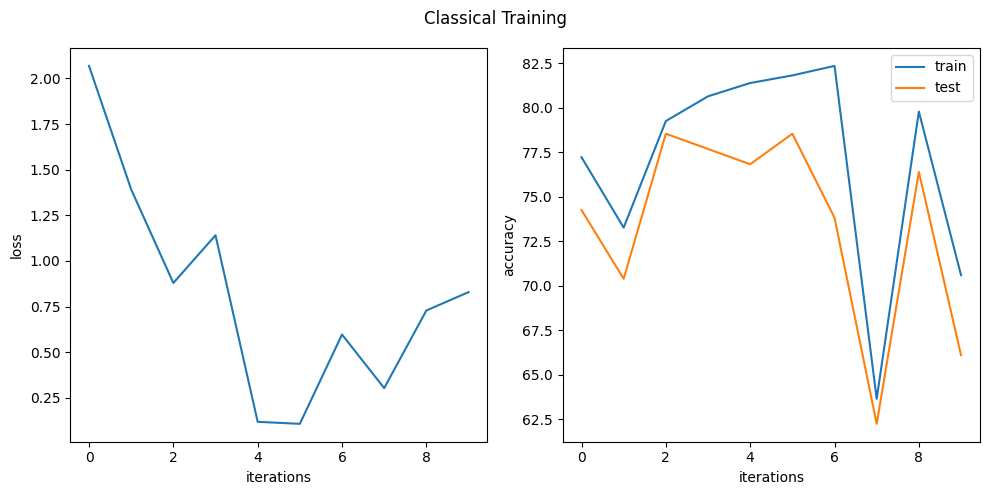

In [9]:
plot_acc_loss("Classical Training", train_acc, test_acc, loss)

In [10]:
torch.save(model.state_dict(), "model_classical_training.pt")